In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

Packages for Mathematical Computation and visualization imported!
Pipeline and preprocessing packages imported!


In [2]:
change = pd.read_csv('Changes-rural.csv', index_col = 'Unnamed: 0')

In [3]:
change.head()

,Town,Change,positive,County
4,Furbo,284975.0,True,Galway
12,Whitegate Clare,248385.0,True,Clare
18,Tullyallen,221442.0,True,Louth
21,Spanish Point,216707.0,True,Clare
26,Crossabeg,201013.0,True,Wexford


In [4]:
out = pd.read_csv('outside-dub-subset.csv', index_col = 'Unnamed: 0')
out.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode
17413,"95 Eallagh, Headford",Galway,50000.0,1,0,0,2,2014,1,Headford,West,0,Eallagh Headford,Connacht,Estate,94634.15,H91
17414,"Well Garden, Ballydotia, Moycullen",Galway,275000.0,1,1,1,2,2014,1,Moycullen,West,0,Ballydotia Moycullen,Connacht,Other,520487.80,H91
17415,"38 Fern Hill, Ballydavid South, Athenry",Galway,120000.0,1,1,1,1,2014,1,Athenry,West,0,Ballydavid South Athenry,Connacht,Estate,227121.95,H65
17416,"117 Lismore, Cappagh Rd, Barna",Galway,350000.0,1,1,1,1,2014,1,Barna,West,0,Cappagh Road Barna,Connacht,Estate,662439.02,H91
17417,"34 The Maples, Glenbrack Rd, Gort",Galway,160000.0,1,1,1,1,2014,1,Gort,West,0,Glenbrack Road Gort,Connacht,Estate,302829.27,H65


In [5]:
# 20000 like before
change1 = change.loc[change['Change'] >= 20000]
k = list(set(change1['Town']))

In [6]:
out1 = out.loc[out['Town'].isin(k)]

In [7]:
out1.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode
17413,"95 Eallagh, Headford",Galway,50000.0,1,0,0,2,2014,1,Headford,West,0,Eallagh Headford,Connacht,Estate,94634.15,H91
17415,"38 Fern Hill, Ballydavid South, Athenry",Galway,120000.0,1,1,1,1,2014,1,Athenry,West,0,Ballydavid South Athenry,Connacht,Estate,227121.95,H65
17417,"34 The Maples, Glenbrack Rd, Gort",Galway,160000.0,1,1,1,1,2014,1,Gort,West,0,Glenbrack Road Gort,Connacht,Estate,302829.27,H65
17418,"Cartref, Crowe Street, Gort",Galway,145000.0,1,1,1,1,2014,1,Gort,West,0,Crowe Street Gort,Connacht,Other,274439.02,H65
17419,"Cloonaghgarve, Milltown, Tuam",Galway,74000.0,1,0,0,2,2014,1,Tuam,West,0,Milltown Tuam,Connacht,Other,140058.54,H54


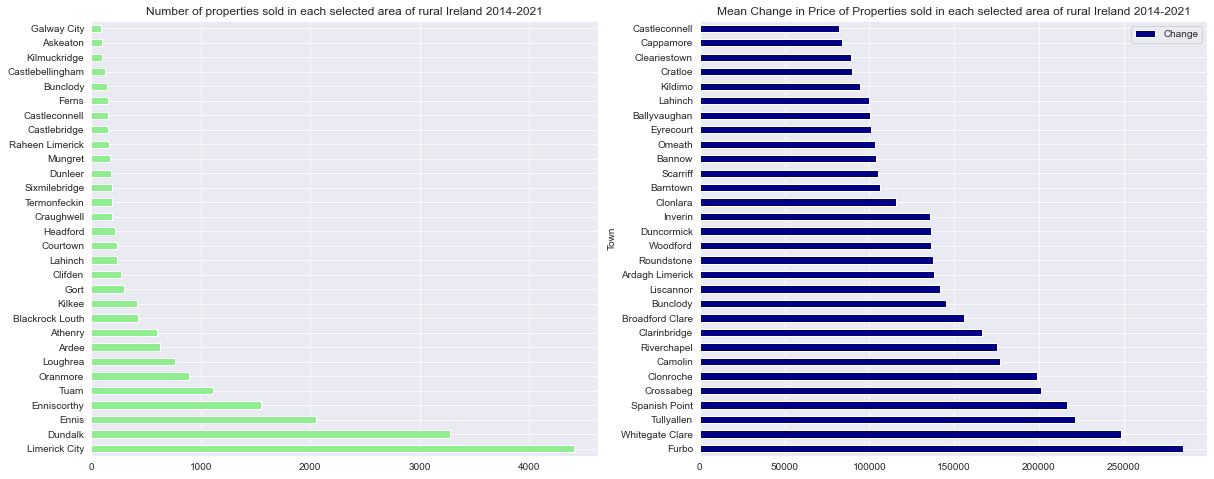

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
out1['Town'].value_counts()[:30].plot(kind='barh', color='lightgreen',
                                 title='Number of properties sold in each selected area of rural Ireland 2014-2021', ax = ax1)
change1[:30].plot.barh(x = 'Town', y = 'Change', ax = ax2, title='Mean Change in Price of Properties sold in each selected area of rural Ireland 2014-2021',
             color='navy')
plt.show()

In [18]:
out2 = out1.groupby("Town").filter(lambda x: len(x) > 125)
lsts = list(set(out2['Town']))

In [19]:
change2 = change1.loc[change1['Town'].isin(lsts)]

In [24]:
change2.head()

,Town,Change,positive,County
47,Bunclody,145034.0,True,Wexford
81,Lahinch,99726.0,True,Clare
104,Castleconnell,81769.0,True,Limerick
117,Raheen Limerick,72272.0,True,Limerick
132,Dunleer,66588.0,True,Louth


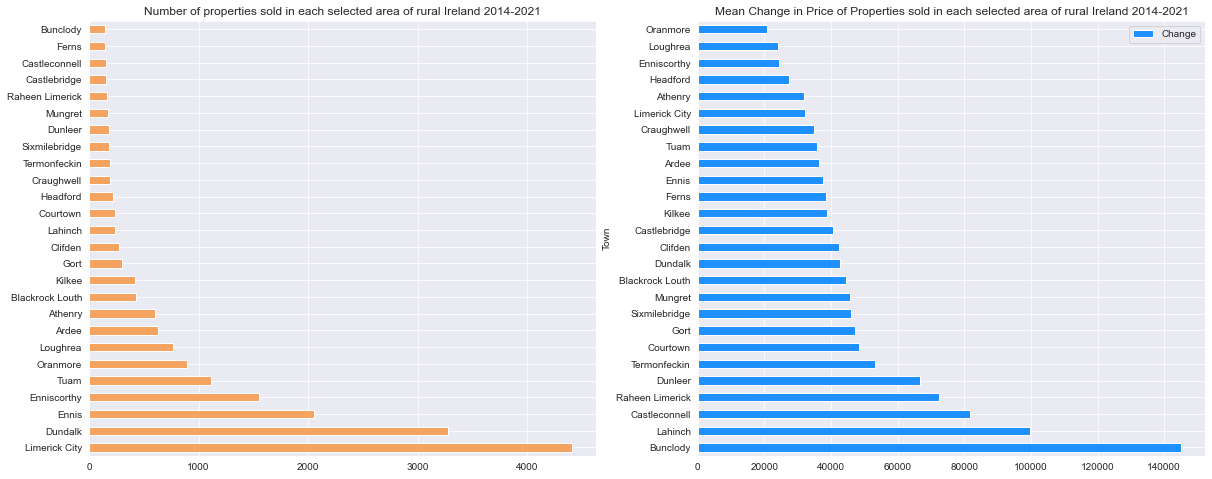

In [22]:
# plot 2
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
out2['Town'].value_counts().plot(kind='barh', color='sandybrown',
                                 title='Number of properties sold in each selected area of rural Ireland 2014-2021', ax = ax1)
change2.plot.barh(x = 'Town', y = 'Change', ax = ax2, title='Mean Change in Price of Properties sold in each selected area of rural Ireland 2014-2021',
             color='dodgerblue')
plt.show()

In [25]:
## geocode tomorrow